(**You can also open this notebook in Google Colab**)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-fall/2023-10-17/notebook/code_demo.ipynb)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Explore AAPL historical stock data
- Data source: https://www.kaggle.com/datasets/rprkh15/sp500-stock-prices
- Content
    - `Date`: The date is in the format yy-mm-dd
    - `Open`: Price of the stock when the market opens
    - `High`: Highest price reached in the day
    - `Low`: Lowest price reached in the day
    - `Close`: Price of the stock when the market closes
    - `Volume`: Number of shares traded in a day
    - `Dividends`: The dividends of the stock
    - `Stock Splits`: The stock splits of the company. In a stock split, a company divides its existing stock into multiple shares to boost liquidity.

## Ingest the data

In [3]:
df = pd.read_csv('../data/AAPL.csv')
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1,1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
2,1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10483 entries, 0 to 10482
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10483 non-null  object 
 1   Open          10483 non-null  float64
 2   High          10483 non-null  float64
 3   Low           10483 non-null  float64
 4   Close         10483 non-null  float64
 5   Volume        10483 non-null  int64  
 6   Dividends     10483 non-null  float64
 7   Stock Splits  10483 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 655.3+ KB


In [5]:
df['Date'] = df['Date'].map(pd.to_datetime)
df.set_index('Date', inplace=True)
df.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100178,0.100614,0.100178,0.100178,469033600,0.0,0.0
1980-12-15,0.095388,0.095388,0.094952,0.094952,175884800,0.0,0.0
1980-12-16,0.088418,0.088418,0.087983,0.087983,105728000,0.0,0.0


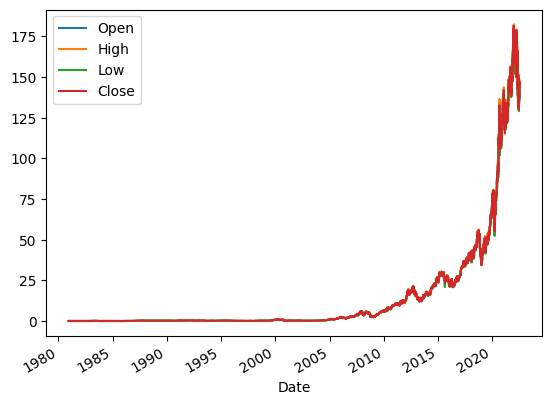

In [6]:
df['Open'].plot(label='Open')
df['High'].plot(label='High')
df['Low'].plot(label='Low')
df['Close'].plot(label='Close')
plt.legend()
plt.show()

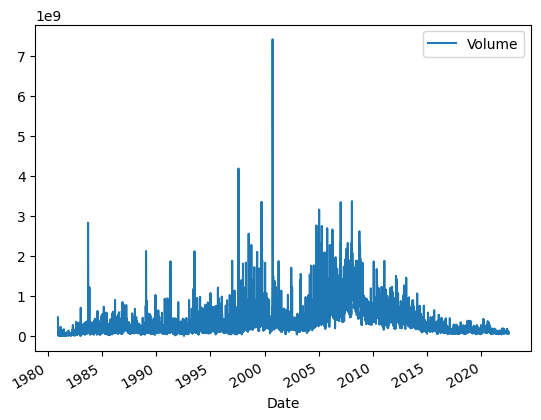

In [7]:
df['Volume'].plot(label='Volume')
plt.legend()
plt.show()

In [8]:
print(df.index.min())
print(df.index.max())

1980-12-12 00:00:00
2022-07-12 00:00:00


In [9]:
# Earliest date index location
print('Earliest date index location is: ',df.index.argmin())

# Latest date location
print('Latest date location: ',df.index.argmax())

Earliest date index location is:  0
Latest date location:  10482


## Visualization

In [10]:
df_past_5yr = df['2017-01':'2022-01']
df_past_5yr.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,27.175510,27.299888,26.931447,27.257647,115127600,0.0,0.0
2017-01-04,27.187244,27.342131,27.163777,27.227139,84472400,0.0,0.0
2017-01-05,27.203668,27.424264,27.177853,27.365595,88774400,0.0,0.0


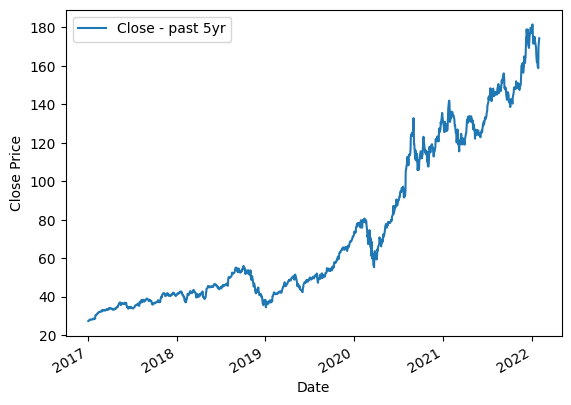

In [11]:
df_past_5yr.Close.plot(label='Close - past 5yr')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [12]:
df_2020 = df.loc['2020',]
df_2020.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,72.776219,73.847328,72.518272,73.785912,135480400,0.0,0.0
2020-01-03,72.999771,73.842405,72.840090,73.068558,146322800,0.0,0.0
2020-01-06,72.174345,73.690103,71.918850,73.650795,118387200,0.0,0.0


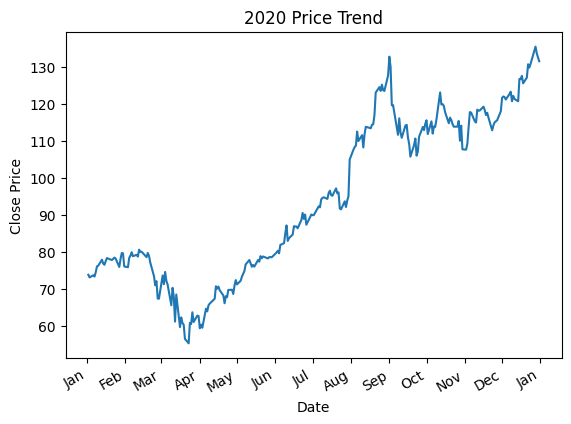

In [13]:
import matplotlib.dates as mdates
ax = df_2020.Close.plot()
ax.set_title('2020 Price Trend') 
ax.set_ylabel('Close Price')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.show()

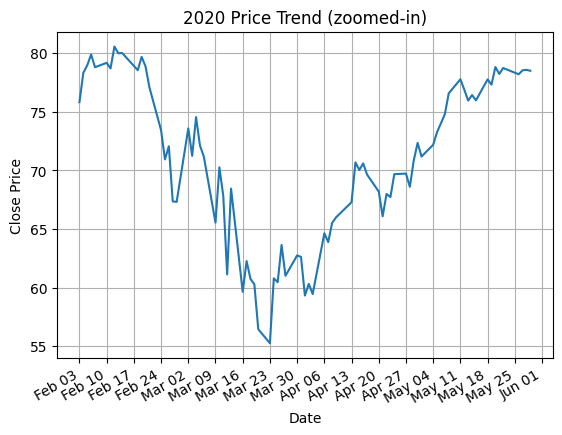

In [14]:
ax = df_2020.loc['2020-02':'2020-05'].Close.plot()
ax.set_title('2020 Price Trend (zoomed-in)') 
ax.set_ylabel('Close Price')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.grid()
plt.show()

## Seasonality decomposition

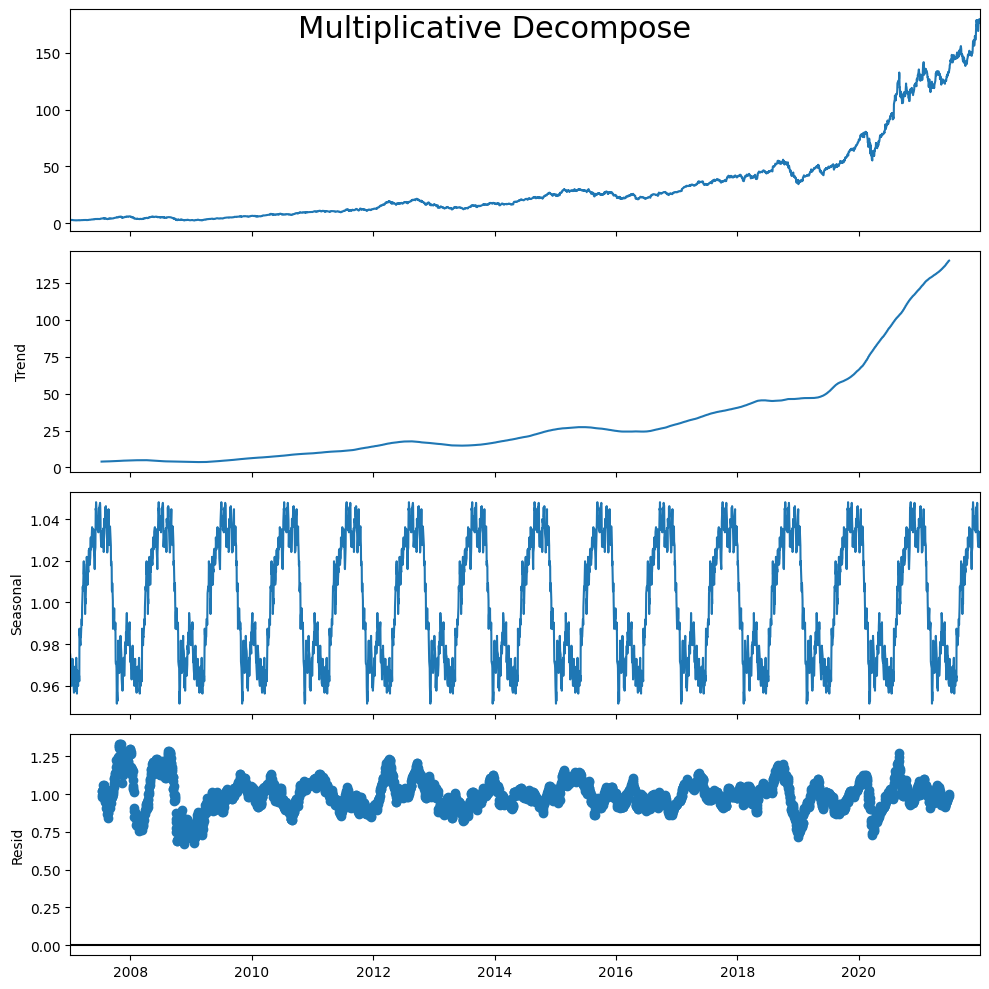

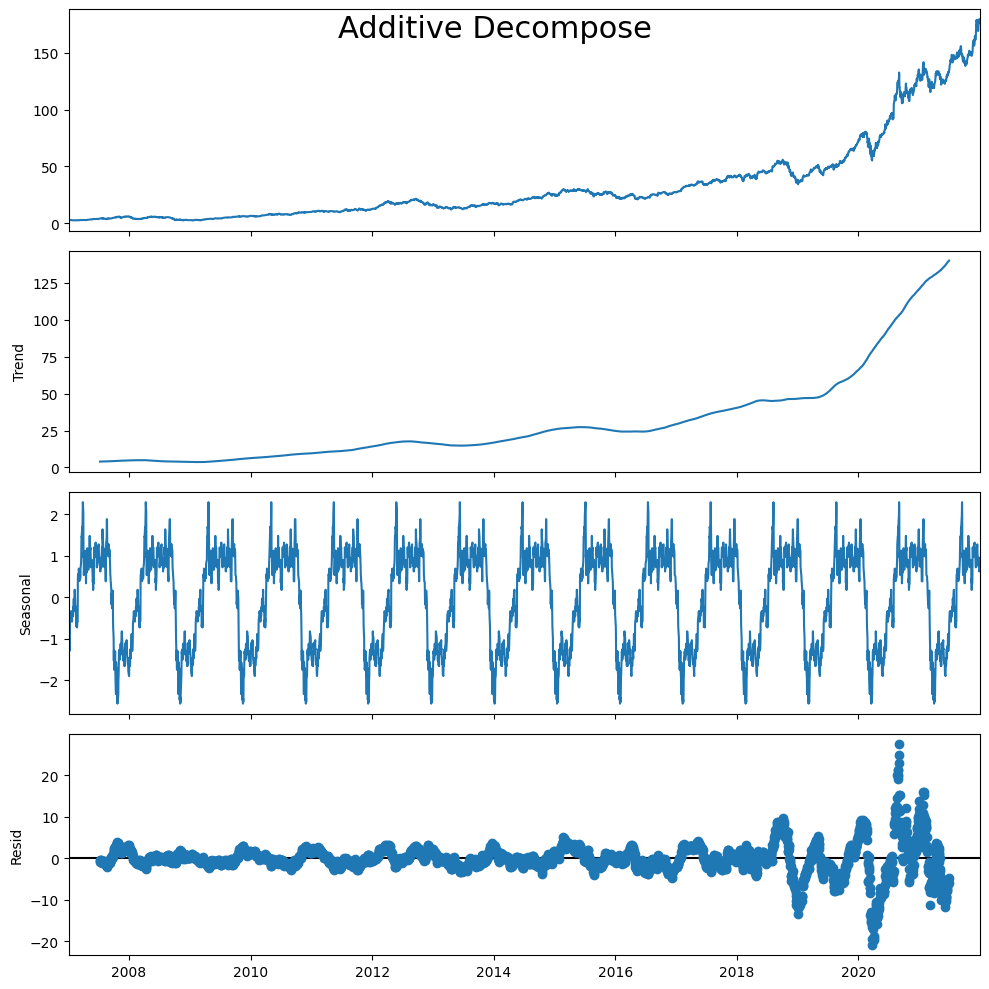

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

y = df.loc['2007':'2021', ['Close']]

# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 260)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 260)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [16]:
## Extract the components

df_decomposed = pd.concat(
    [
        result_mul.seasonal,
        result_mul.trend,
        result_mul.resid,
        result_mul.observed
    ],
    axis=1
)

df_decomposed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_decomposed.tail(10)

,seas,trend,resid,actual_values
Date,,,,
2021-12-17,1.032215,NaN,NaN,170.671478
2021-12-20,1.026686,NaN,NaN,169.285278
2021-12-21,1.031061,NaN,NaN,172.516403
2021-12-22,1.033091,NaN,NaN,175.159149
2021-12-23,1.034067,NaN,NaN,175.797409
2021-12-27,1.032808,NaN,NaN,179.836319
2021-12-28,1.032464,NaN,NaN,178.799149
2021-12-29,1.026485,NaN,NaN,178.888916
2021-12-30,1.029504,NaN,NaN,177.712143


- About `statsmodels.tsa.seasonal.seasonal_decompose`: [[official documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)]
- Read more on time series decomposition: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

## Feature Extraction

In [17]:
df_close = df.loc[:,['Close']]

df_close.reset_index(inplace=True)
df_close['year'] = df_close.Date.dt.year
df_close['month'] = df_close.Date.dt.month
df_close['day'] = df_close.Date.dt.day
df_close['day of week'] = df_close.Date.dt.dayofweek # The day of the week with Monday=0, Sunday=6.
df_close['Weekday Name'] = df_close.Date.dt.day_name()


#Set Date column as the index column.
df_close.set_index('Date', inplace=True)

df_close.head(3)

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
1980-12-12,0.100178,1980,12,12,4,Friday
1980-12-15,0.094952,1980,12,15,0,Monday
1980-12-16,0.087983,1980,12,16,1,Tuesday


## Resampling

In [18]:
df_close.Close.resample(rule = 'A').mean().head(5)

Date
1980-12-31    0.106075
1981-12-31    0.084724
1982-12-31    0.066703
1983-12-31    0.130561
1984-12-31    0.093390
Freq: A-DEC, Name: Close, dtype: float64

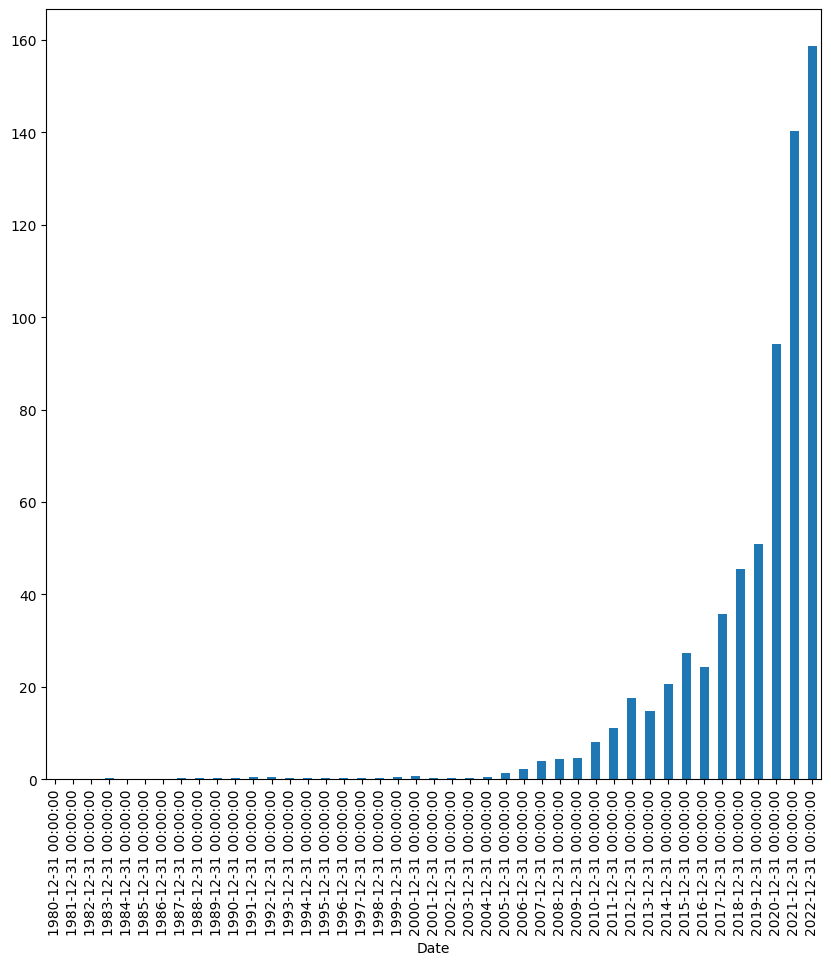

In [19]:
df_close.Close.resample(rule = 'A').mean().plot(kind='bar')
plt.show()

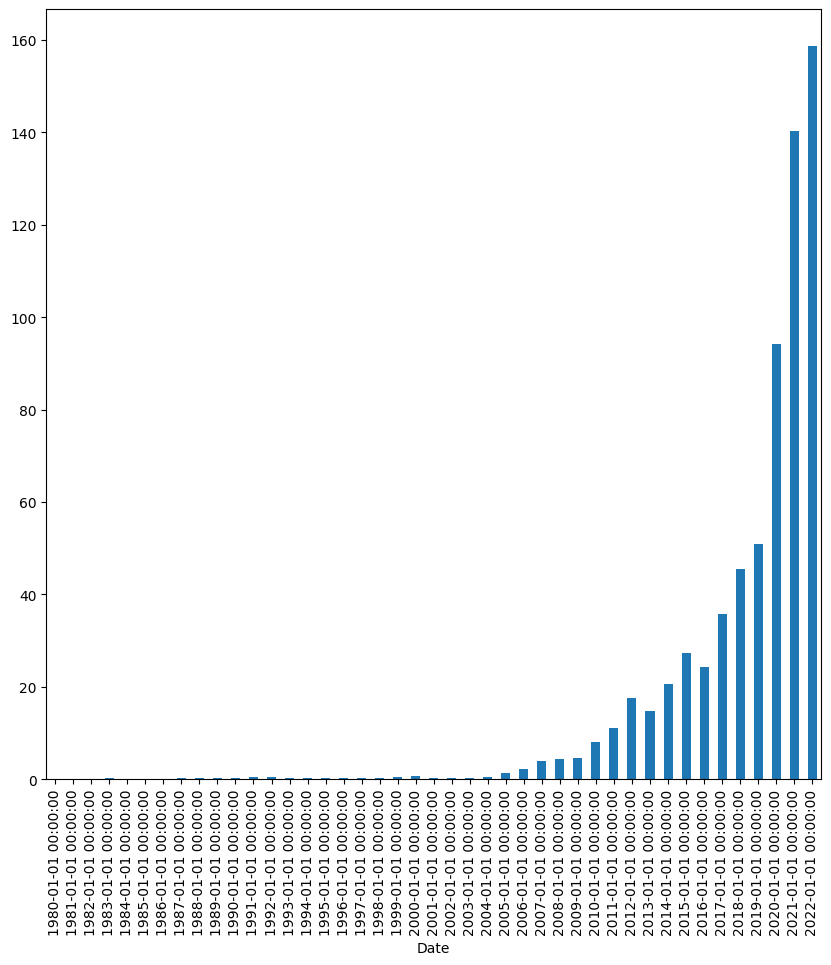

In [20]:
df_close.Close.resample(rule = 'AS').mean().plot(kind='bar')
plt.show()

## Time Shifting

In [21]:
df_close.shift(1).head(5)

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
1980-12-12,NaN,NaN,NaN,NaN,NaN,None
1980-12-15,0.100178,1980.0,12.0,12.0,4.0,Friday
1980-12-16,0.094952,1980.0,12.0,15.0,0.0,Monday
1980-12-17,0.087983,1980.0,12.0,16.0,1.0,Tuesday
1980-12-18,0.090160,1980.0,12.0,17.0,2.0,Wednesday


In [22]:
df_close.shift(-1).head(5)

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
1980-12-12,0.094952,1980.0,12.0,15.0,0.0,Monday
1980-12-15,0.087983,1980.0,12.0,16.0,1.0,Tuesday
1980-12-16,0.090160,1980.0,12.0,17.0,2.0,Wednesday
1980-12-17,0.092774,1980.0,12.0,18.0,3.0,Thursday
1980-12-18,0.098436,1980.0,12.0,19.0,4.0,Friday


In [23]:
df_close.shift(periods=1, freq='M').head(5)

,Close,year,month,day,day of week,Weekday Name
Date,,,,,,
1980-12-31,0.100178,1980,12,12,4,Friday
1980-12-31,0.094952,1980,12,15,0,Monday
1980-12-31,0.087983,1980,12,16,1,Tuesday
1980-12-31,0.090160,1980,12,17,2,Wednesday
1980-12-31,0.092774,1980,12,18,3,Thursday


## Rolling Window

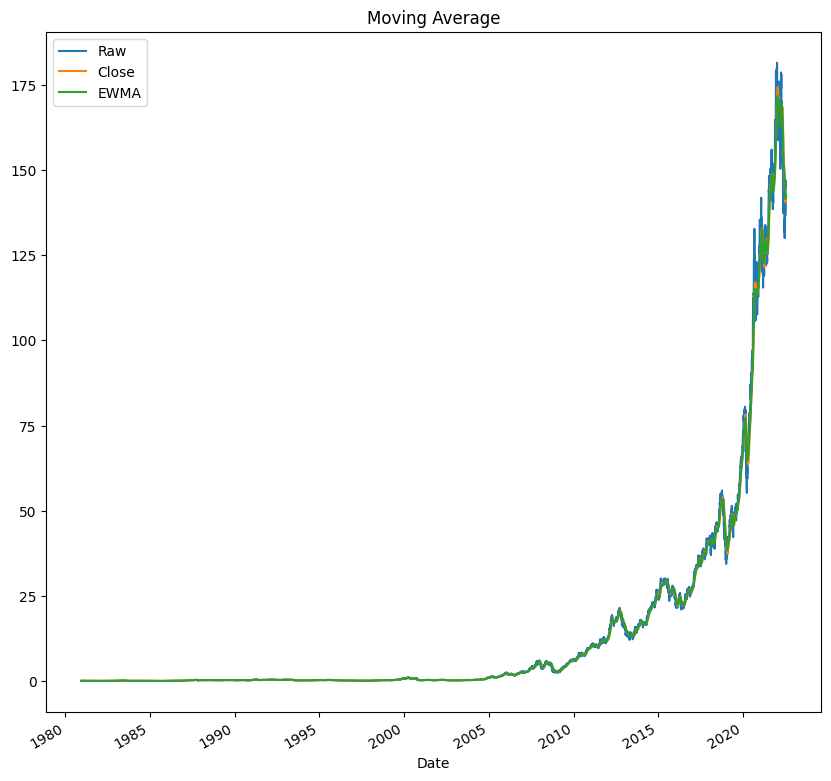

In [24]:
df_close.Close.plot(label='Raw')
df_close.Close.rolling(window=30).mean().plot(title='Moving Average')
df_close.Close.ewm(span=30).mean().plot(label='EWMA')
plt.legend()
plt.show()

# The Python Visualization Landscape


`Visualization` is one of the most important tasks in data analysis. In data exploration stage, you could use visualization to identify outliers and some general patterns exist in the data. In modeling stage, you could use visualization to monitor the performance of your model. In reporting stage, you could use visualization to better illustrate the business insight you want to deliver to the audience. There are a couple of commonly used Python libraries that could help with these use cases:

**Matplotlib**<br/>
`matplotlib` is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is the most popular plotting library in Python, which gives users different levels of control over every aspect of a figure.

**Seaborn**<br/>
`seaborn` provides a high-level interface for drawing attractive and informative statistical graphics. It builds on top of matplotlib and integrates closely with pandas data structures.

**Plotly**<br/>
`plotly` is an open source library enables users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web application using `Dash`

**Bokeh**<br/>
Bokeh is an interactive visualization library for modern web browsers. It provides elegant, concise construction of versatile graphics, and affords high-performance interactivity over large or streaming datasets. Bokeh can help anyone who would like to quickly and easily make interactive plots, dashboards, and data applications.

# Visualization with `matplotlib`

* Comes with the `Anaconda` installation
* If you don't have it on your computer, you could install it with pip or conda at the command line or terminal with
`pip install matplotlib` or `conda install matplotlib`
* `matplotlib` breaks a plot/graph into different components. With the library, you can add/delete/edit these components one by one based on detailed use cases.
* With `matplotlib`, you could create reproducible figures in a programmatic way.

![](https://matplotlib.org/_images/anatomy1.png)

## Import the core library

In [25]:
import matplotlib.pyplot as plt

**`matplotlib` provides two types of methods for you to contruct plots**
* `Function based methods`: It is a Matlab style plotting functions. The coding is very concise, and you can control the plot from a few high level settings.
* `Object-oriented methods`: It is a method that needs you to create figure objects, and all the plot control statements come from the methods or attributes associated with the figure object. The coding is a little bit more complicated, but you have a finer control on the figure components.

## Function Based Methods

### A simple X-Y plot

In [26]:
import numpy as np
x = np.linspace(0,5,10)
y = x ** 2

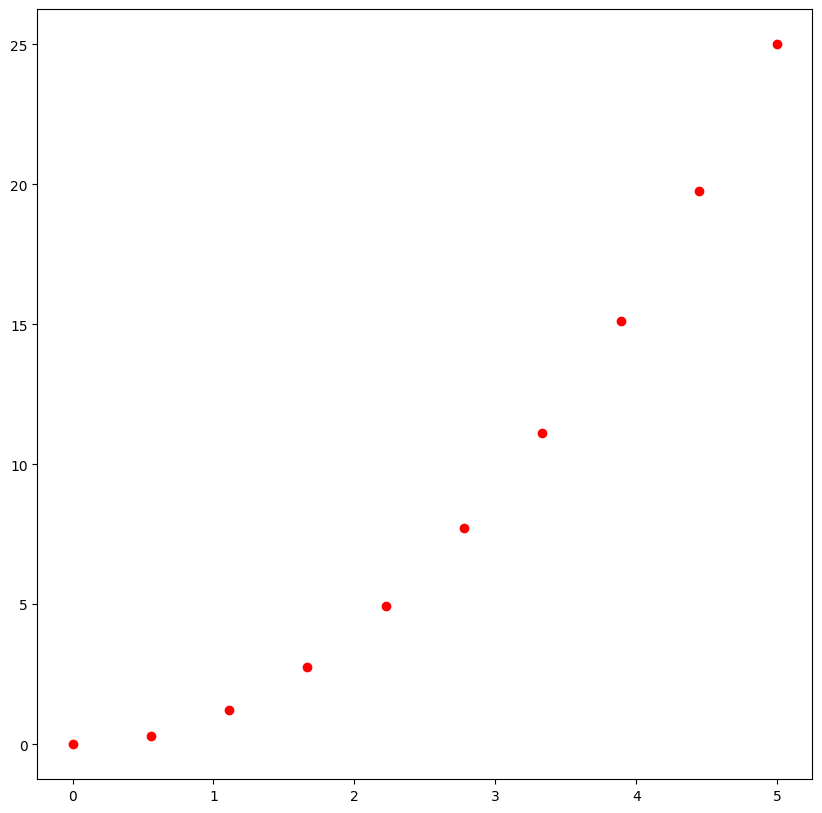

In [27]:
plt.plot(x,y,'ro')
plt.show()

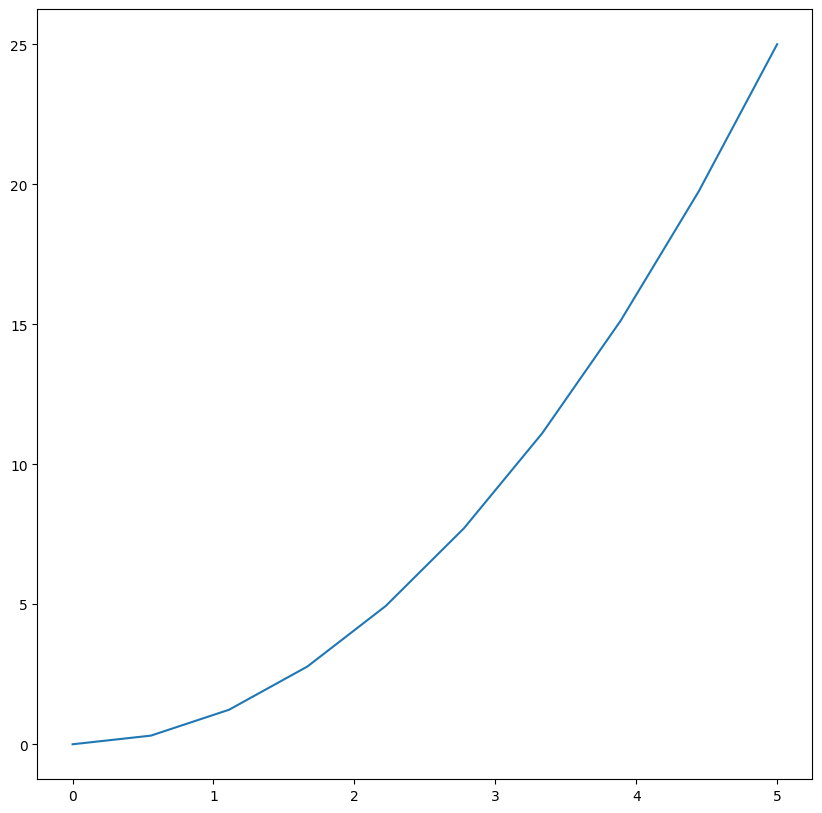

In [28]:
plt.plot(x,y)
plt.show()

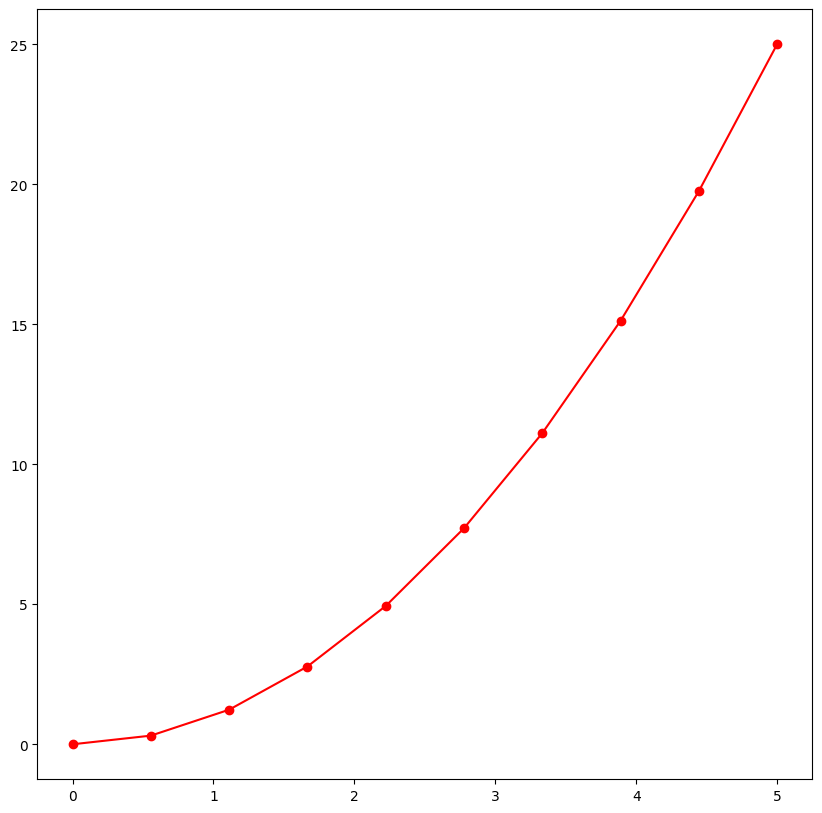

In [29]:
plt.plot(x,y,'ro-')
plt.show()

The format string typically is constructed by 3 components
```python
fmt = '[marker][line][color]'
```
* Check https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html for more details on format strings

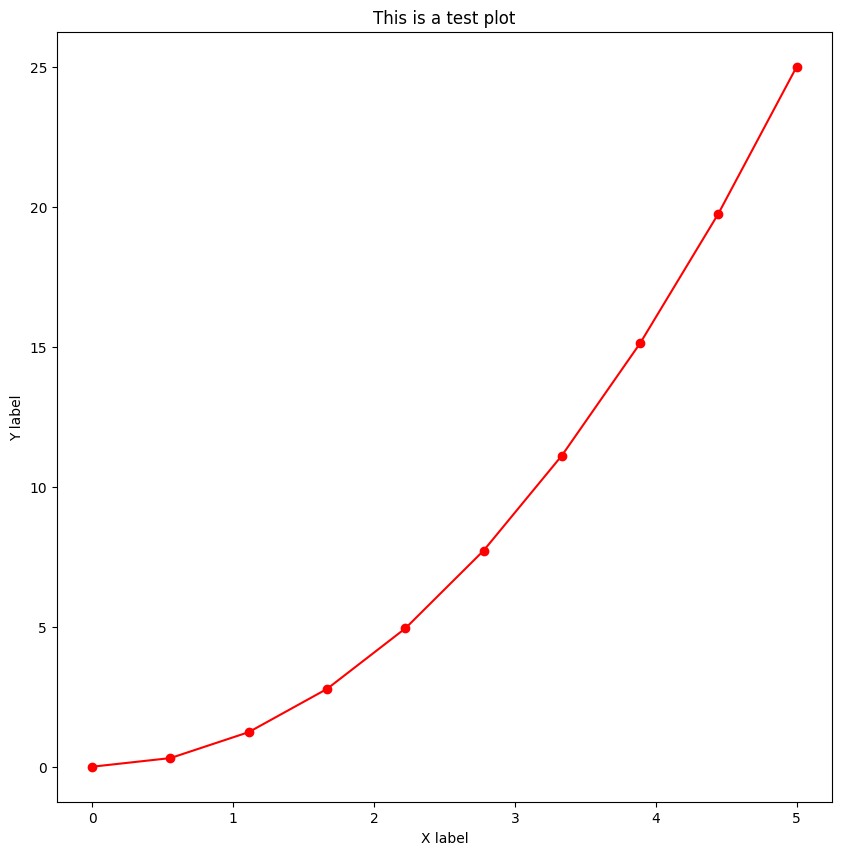

In [30]:
## add titles and x-y axis labels

plt.plot(x,y,'ro-')
plt.title('This is a test plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

### Multiple curves on the same plot

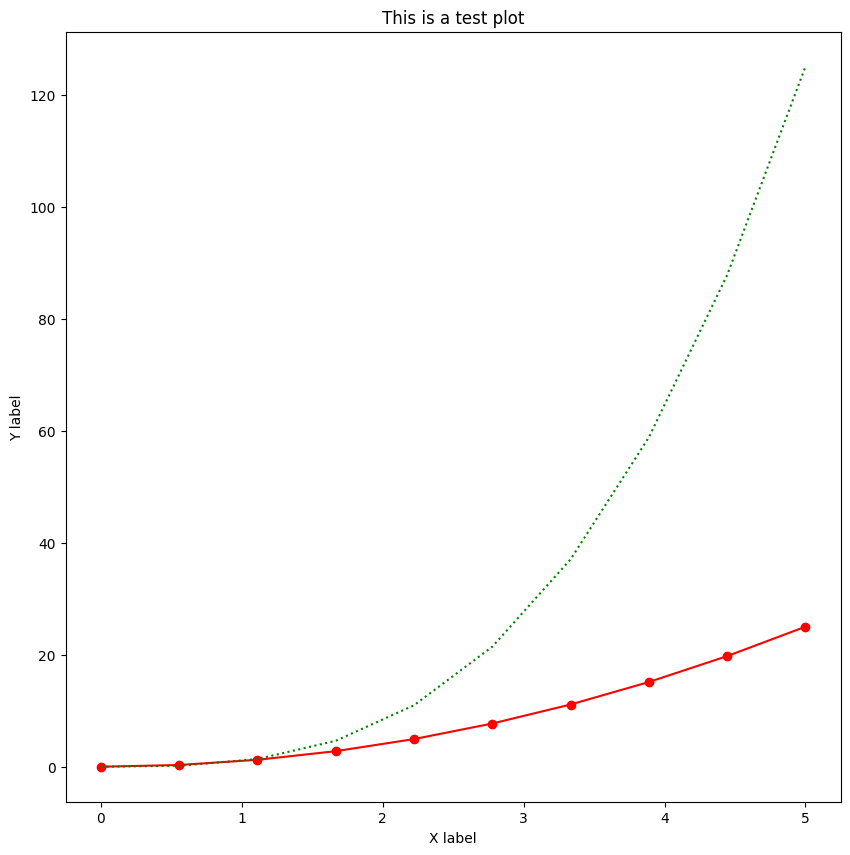

In [31]:
plt.plot(x,y,'ro-')
plt.plot(x,x**3,'g:')
plt.title('This is a test plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

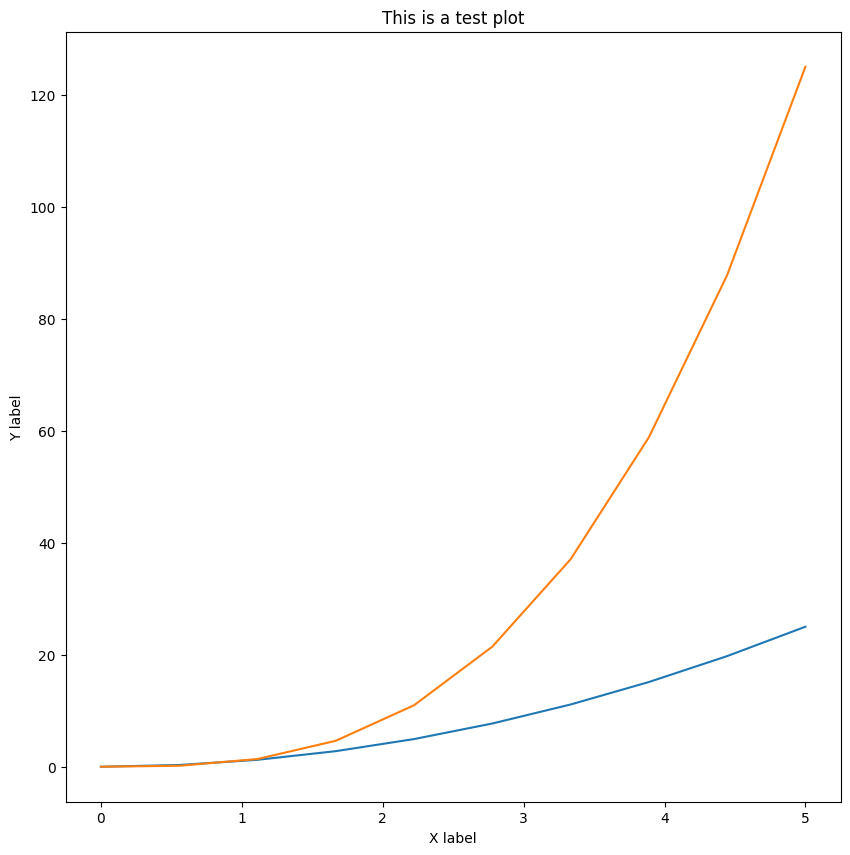

In [32]:
plt.plot(x,y)
plt.plot(x,x**3)
plt.title('This is a test plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.show()

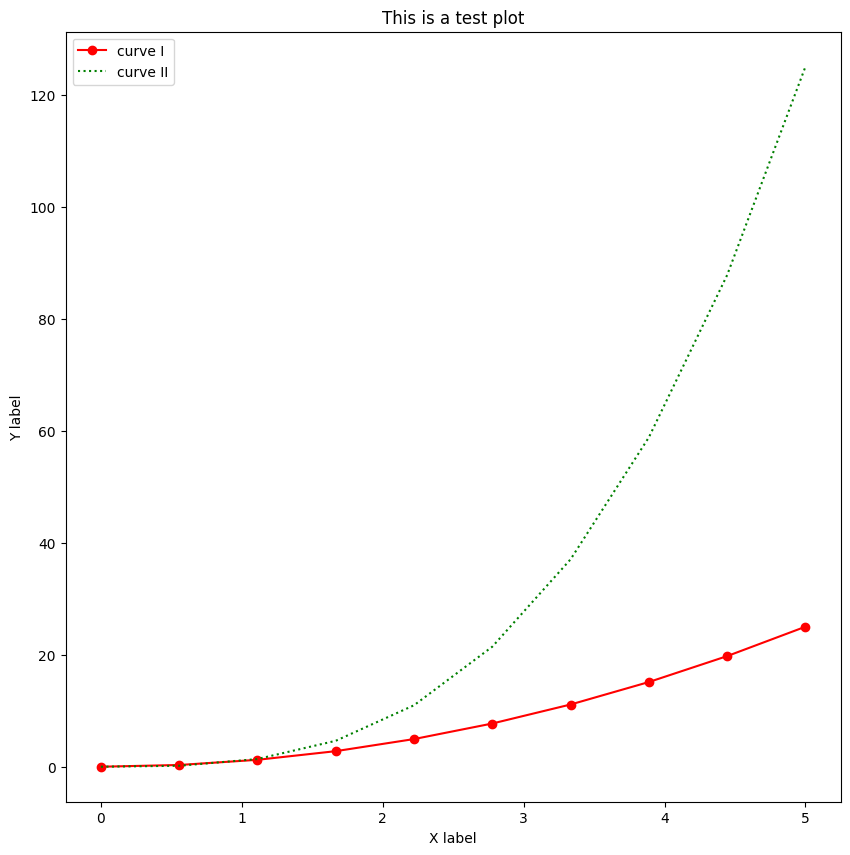

In [33]:
plt.plot(x,y,'ro-', label='curve I')
plt.plot(x,x**3,'g:', label='curve II')
plt.title('This is a test plot')
plt.xlabel('X label')
plt.ylabel('Y label')
plt.legend()
plt.show()

### Multiple plots on the same canvas

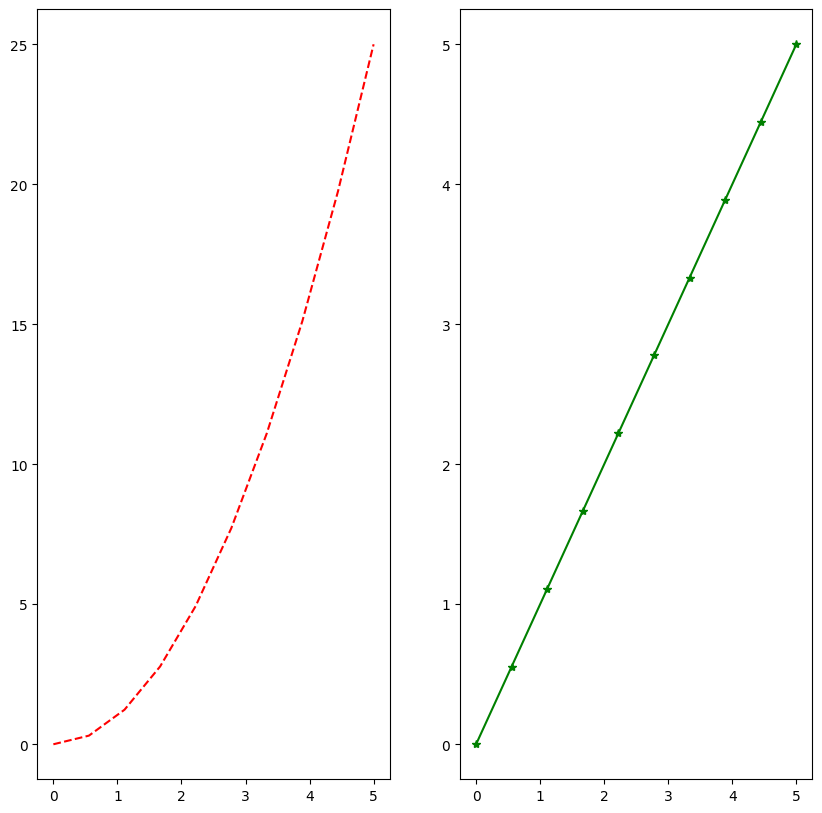

In [34]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(x, x, 'g*-')
plt.show()

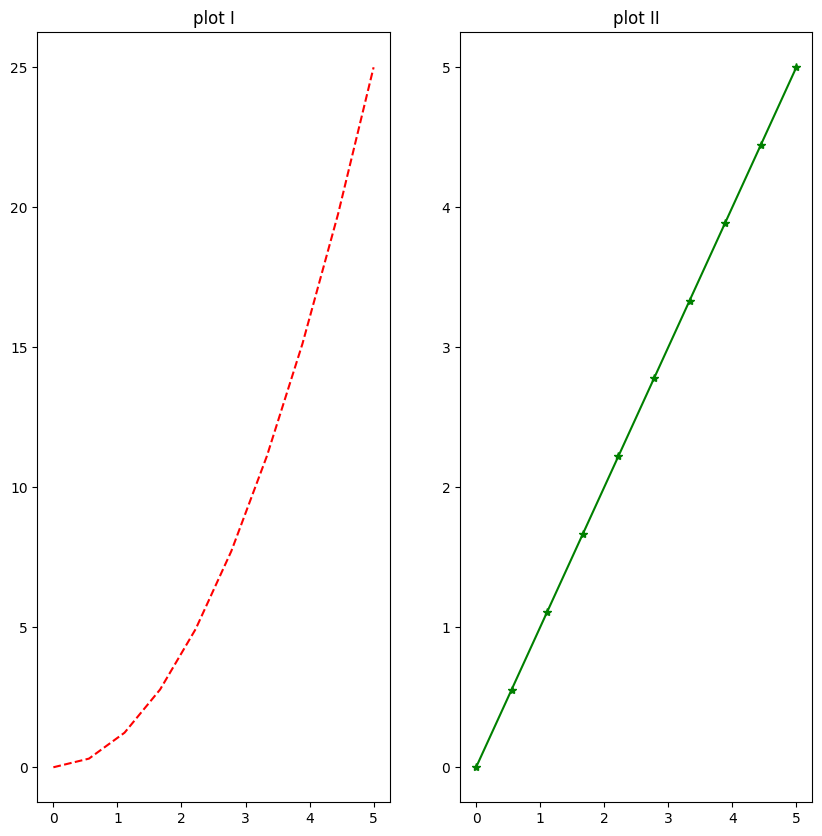

In [35]:
## add titles axis labels
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.title('plot I')
plt.subplot(1,2,2)
plt.plot(x, x, 'g*-')
plt.title('plot II')
plt.show()

## Object-Oriented Methods

### A simple X-Y plot

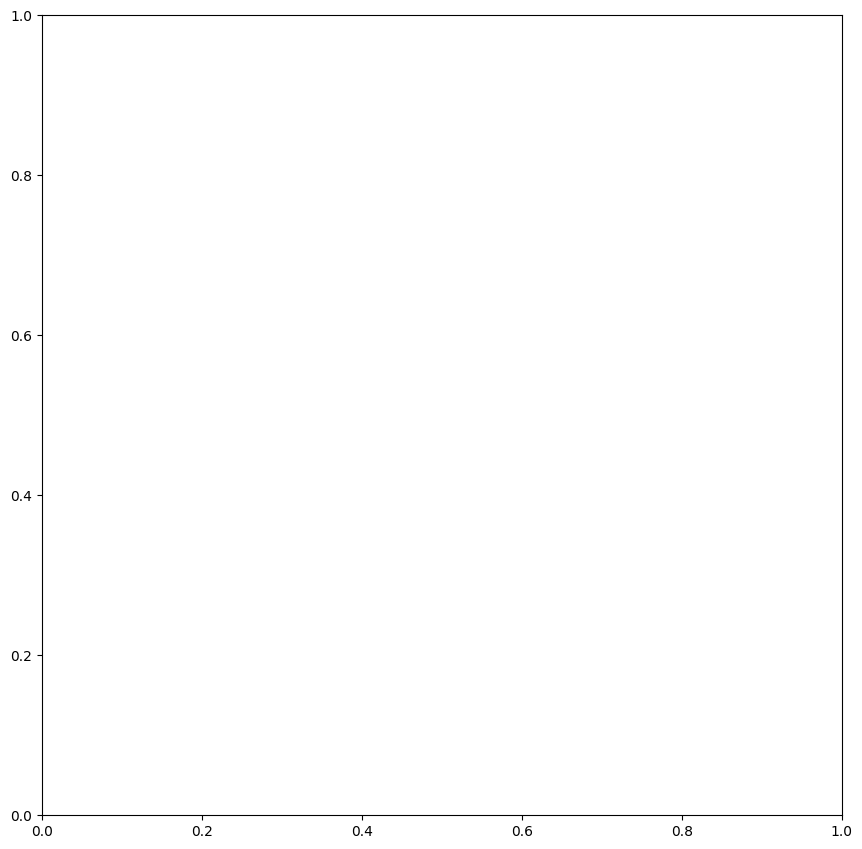

In [36]:
fig = plt.figure()

# Specify the dimensions [left, bottom, width, height] of the new axes
axes = fig.add_axes([0.1,0.1,0.8,0.8])

plt.show()

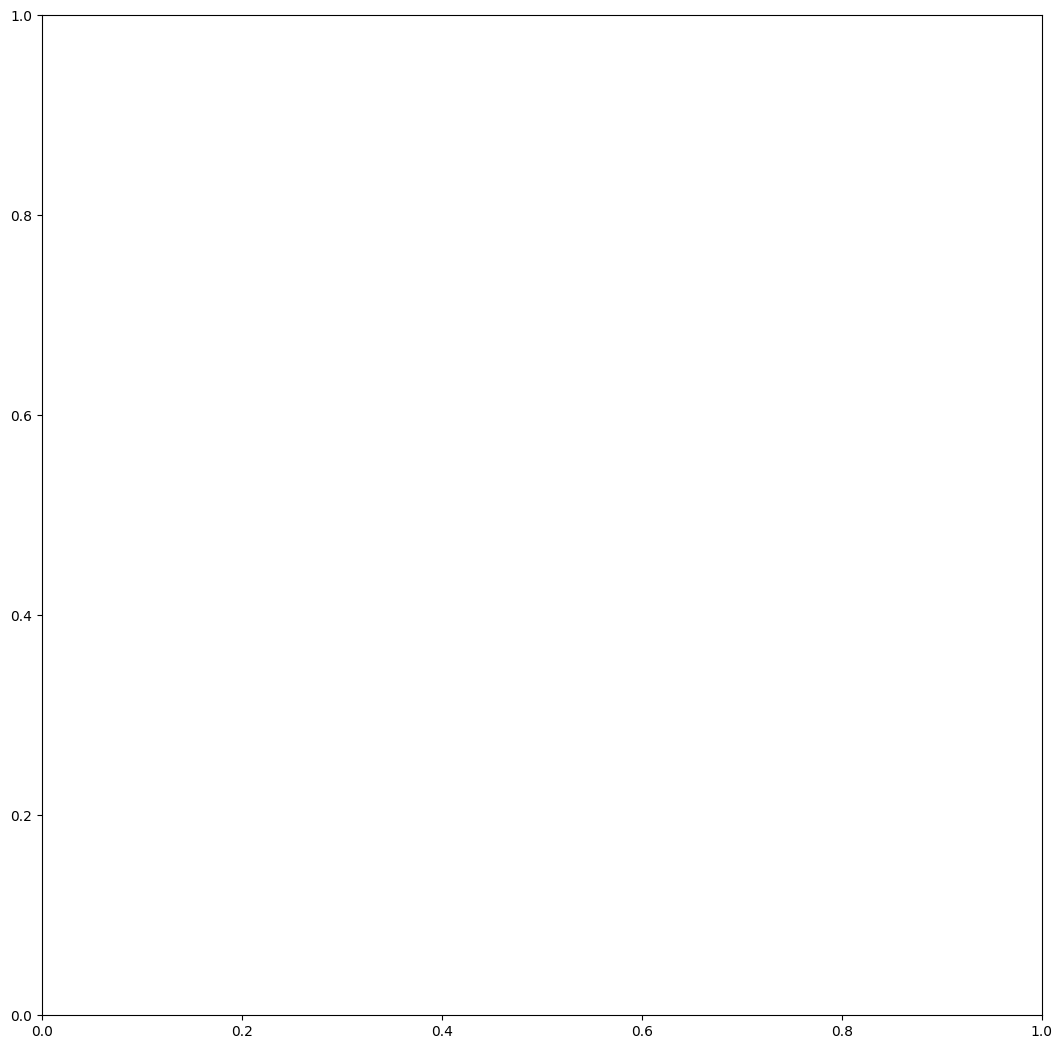

In [37]:
fig = plt.figure()

# Specify the dimensions [left, bottom, width, height] of the new axes
axes = fig.add_axes([0,0,1,1])

plt.show()

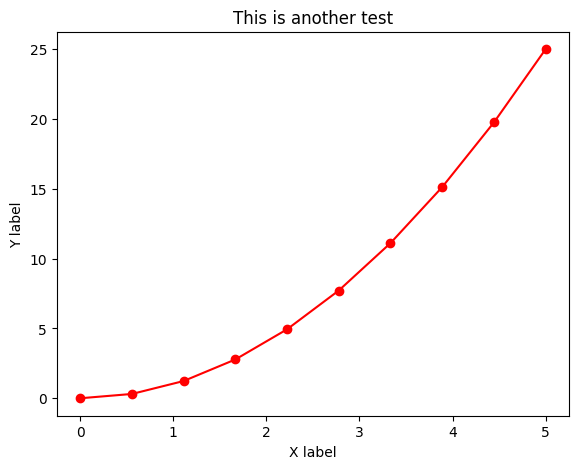

In [ ]:
fig = plt.figure()

# Specify the dimensions [left, bottom, width, height] of the new axes
axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x, y, 'ro-')
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')

plt.show()

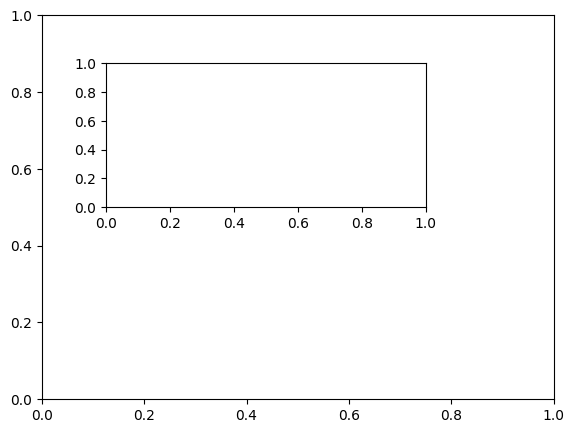

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.5,0.3])

plt.show()

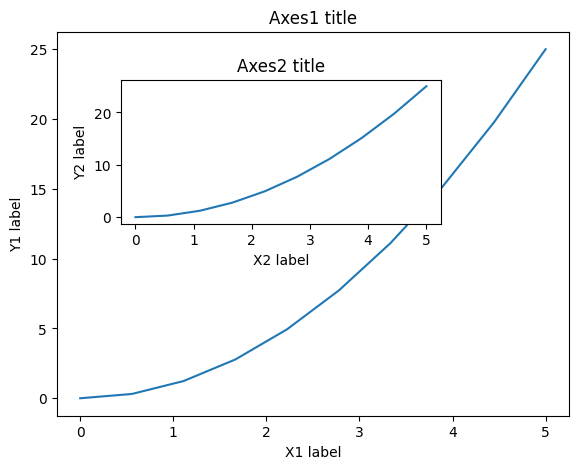

In [ ]:
fig = plt.figure()

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.2,0.5,0.5,0.3])

axes1.plot(x,y)
axes1.set_xlabel('X1 label')
axes1.set_ylabel('Y1 label')
axes1.set_title('Axes1 title')

axes2.plot(x,y)
axes2.set_xlabel('X2 label')
axes2.set_ylabel('Y2 label')
axes2.set_title('Axes2 title')

plt.show()

### Multiple curves on the same plot

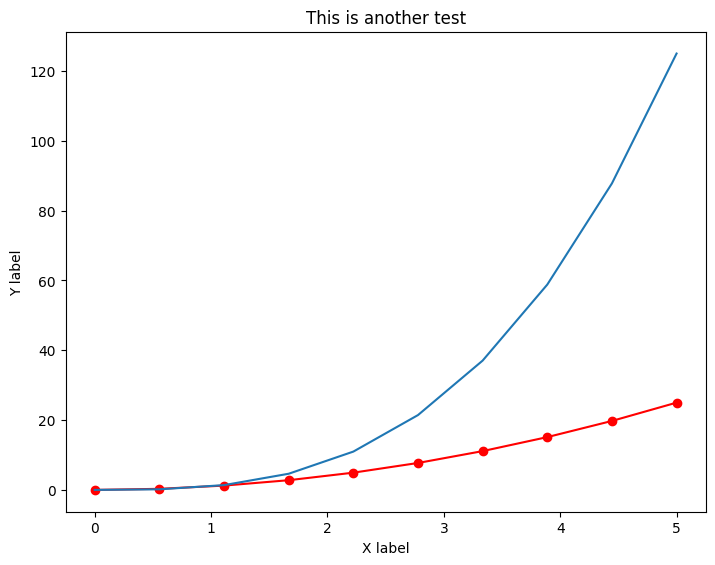

In [ ]:
fig = plt.figure()

# Specify the dimensions [left, bottom, width, height] of the new axes
axes = fig.add_axes([0,0,1,1])

axes.plot(x, y, 'ro-')
axes.plot(x, x**3)
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')

plt.show()

### Multiple plots on the same canvas

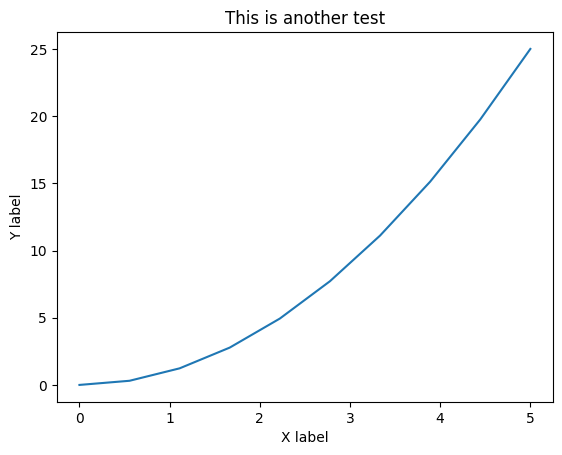

In [ ]:
## revisit the simple X-Y plot

fig, axes = plt.subplots()

axes.plot(x,y)
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')

plt.show()

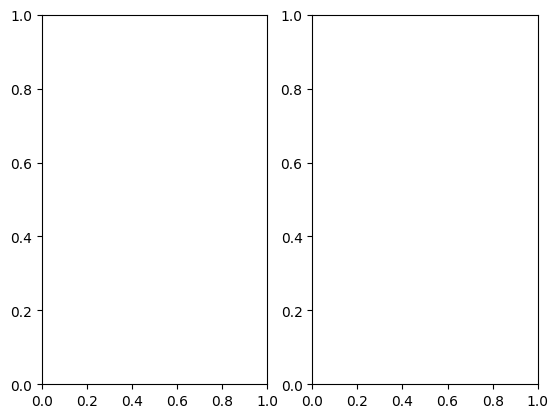

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
# axes

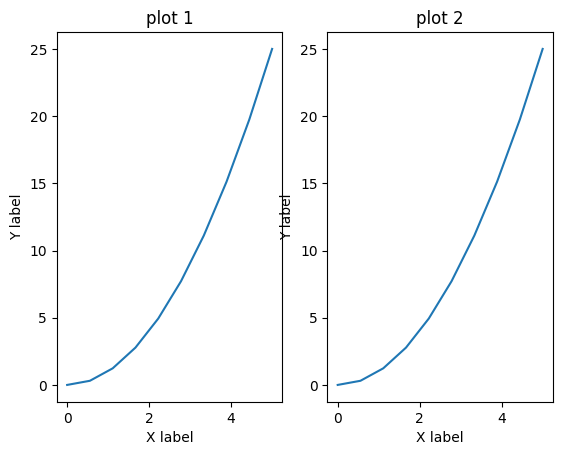

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# for ax in axes:
# for ax in axes:
for idx,ax in enumerate(axes):
    ax.plot(x,y)
    ax.set_xlabel('X label')
    ax.set_ylabel('Y label')
    ax.set_title('plot {}'.format(idx+1))    
plt.show()

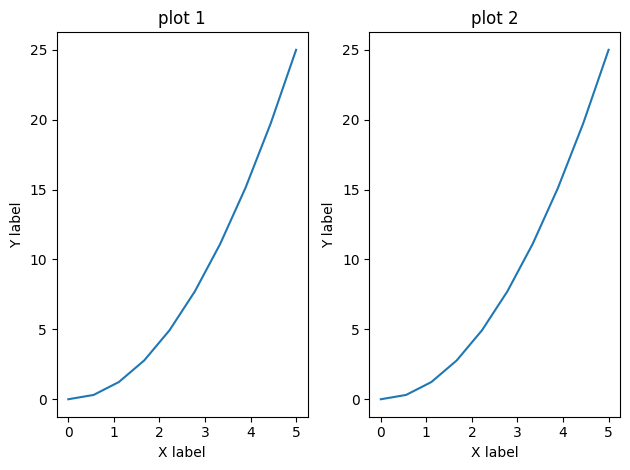

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# for ax in axes:
for idx,ax in enumerate(axes):
    ax.plot(x,y)
    ax.set_xlabel('X label')
    ax.set_ylabel('Y label')
    ax.set_title('plot {}'.format(idx+1))    

plt.tight_layout()
plt.show()

## Save figures

In [ ]:
fig.savefig('test1.png') # Supports format of PNG, JPG, EPS, SVG, PGF and PDF

In [ ]:
fig.savefig('test.png',dpi=1000) # dpi: resolution in dots per inch

## Different types of plots

### Scatter plot

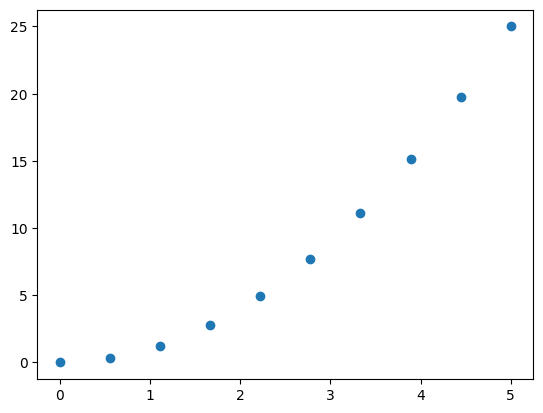

In [ ]:
plt.scatter(x,y)
plt.show()

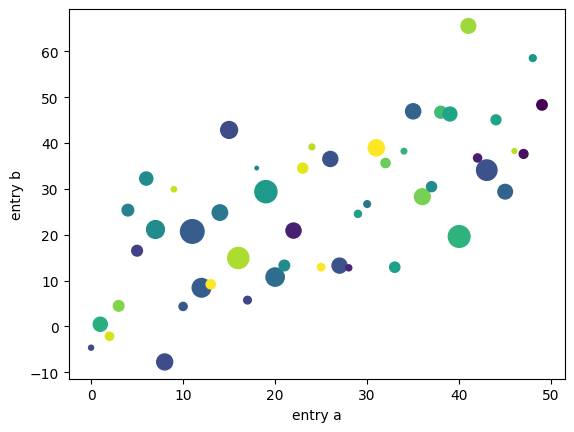

In [ ]:
## a fancier scatter plot

data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df.head(3)

,a,c,d,b
0,0,12,13.109021,-4.650995
1,1,31,102.636398,0.458419
2,2,46,35.350403,-2.160203


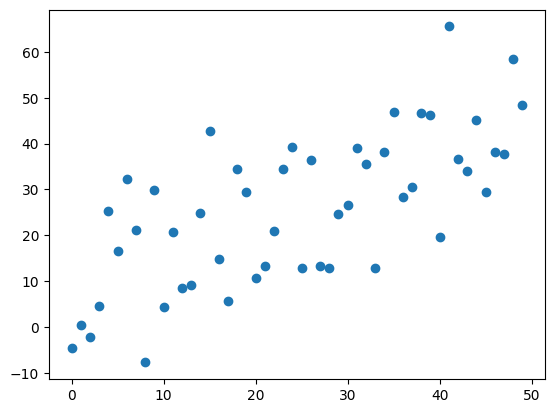

In [ ]:
plt.scatter(data['a'], data['b'])
plt.show()

### Bar chart

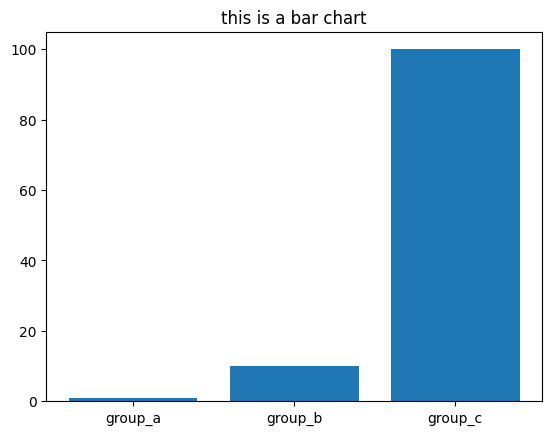

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

# plt.figure()
plt.bar(names, values)
plt.title('this is a bar chart')
plt.show()

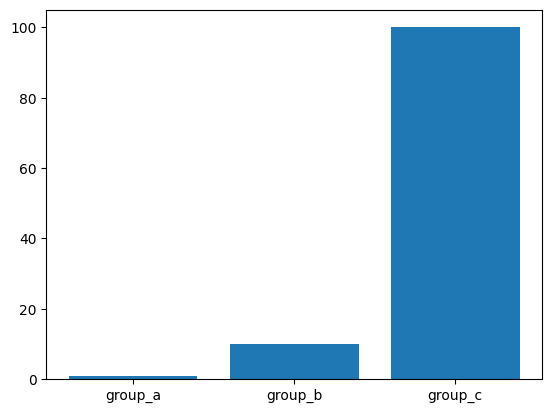

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

fig,axes = plt.subplots()
axes.bar(names, values)

plt.show()


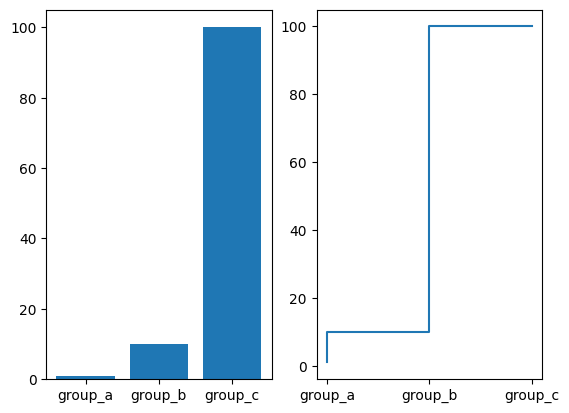

In [ ]:
fig,axes = plt.subplots(1,2)

axes[0].bar(names, values)
axes[1].step(names, values)

plt.show()


In [ ]:
# help(axes[1].step)

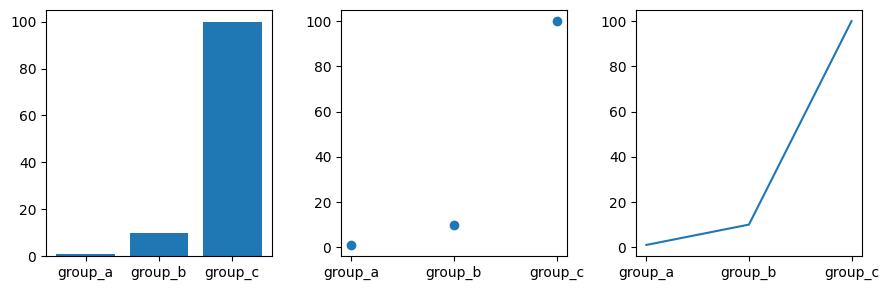

In [ ]:
## different representations

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.tight_layout()
plt.show()

### Histogram

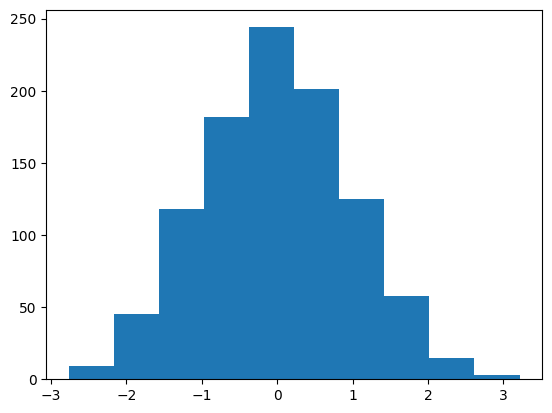

In [ ]:
data = np.random.randn(1000)
plt.hist(data)
plt.show()

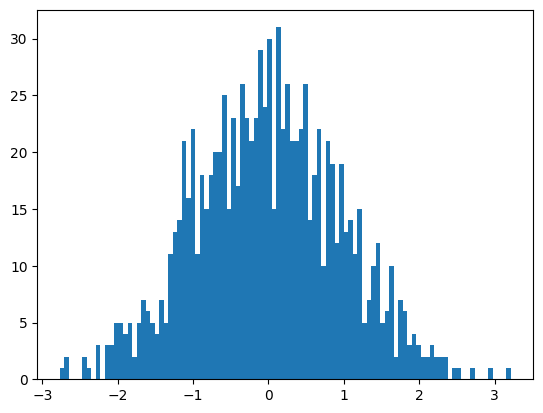

In [ ]:
plt.hist(data, bins=100)
plt.show()

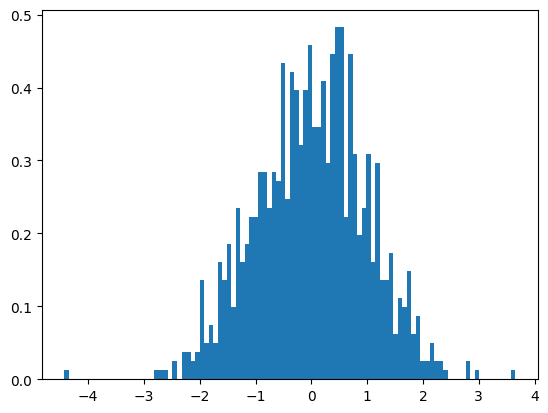

In [ ]:
data = np.random.randn(1000)
plt.hist(data, bins=100, density=True)
plt.show()

### Box plot

In [ ]:
data.shape

(1000,)

In [ ]:
data[:3]

array([ 0.12707482,  0.74267547, -0.83589117])

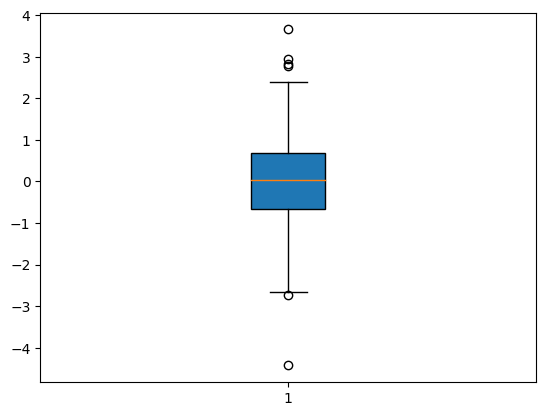

In [ ]:
plt.boxplot(data, vert=True, patch_artist=True)
plt.show()

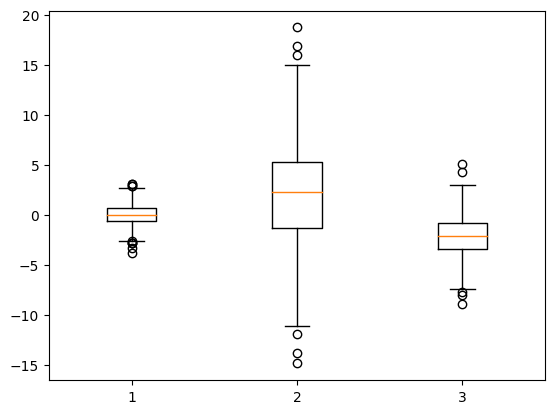

In [ ]:
data = [
    np.random.randn(1000),
    np.random.randn(1000)*5 + 2,
    np.random.randn(1000)*2 - 2
]

plt.boxplot(data,vert=True)
plt.show()

### Color fill

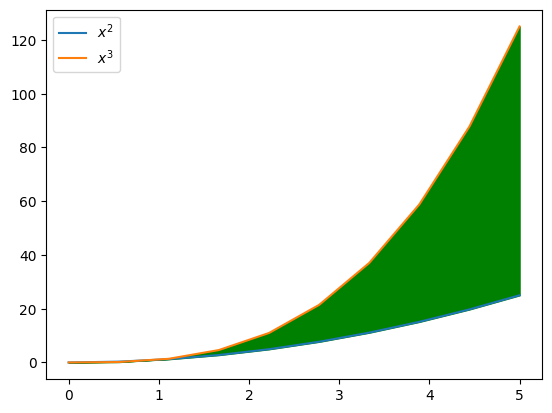

In [ ]:
fig,axes = plt.subplots()
axes.fill_between(x, x**2, x**3, color="green")

# plt.plot(x, x**2, label='$x^2$')
# plt.plot(x, x**3, label='$x^3$')
# plt.legend()

axes.plot(x, x**2, label='$x^2$')
axes.plot(x, x**3, label='$x^3$')
axes.legend()

plt.show()


## Figure paramter tuning

### Plot range

In [ ]:
## revisit the simple X-Y plot

fig, axes = plt.subplots()

axes.plot(x,y)
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')
axes.set_xlim(0,3)
axes.set_ylim(0,10)

plt.show()

### Legend

In [ ]:
## plot multiple lines in one graph

fig, axes = plt.subplots()

axes.plot(x,y,label='$x^2$')
axes.plot(x, x**3, label='$x^3$')

axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')
axes.set_xlim(0,3)
axes.set_ylim(0,10)

axes.legend()
plt.show()

You can customize the position of the legend box

```sh
        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============
```

In [ ]:
fig, axes = plt.subplots()

axes.plot(x,y,label='$x^2$')
axes.plot(x, x**3, label='$x^3$')

axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('This is another test')
axes.set_xlim(0,3)
axes.set_ylim(0,10)

axes.legend(loc=1) # customize the position
plt.show()

### Text

In [ ]:
## add a text annotation at a specific position in the graph
fig,ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Line colors, width, styles
* For detailed parameter settings, check https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(0,5,20)
ax.plot(x, x+1, color='b')
ax.plot(x, x+2, color='g')
ax.plot(x, x+3, color='r')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='r', linewidth=0.25)
ax.plot(x, x+2, color='r', linewidth=0.50)
ax.plot(x, x+3, color='r', linewidth=1.00)
ax.plot(x, x+4, color='r', linewidth=2.00)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='r', linewidth=0.25)
ax.plot(x, x+2, color='r', linewidth=0.50)
ax.plot(x, x+3, color='r', linewidth=1.00)
ax.plot(x, x+4, color='r', linewidth=2.00)

ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='r', linewidth=0.25)
ax.plot(x, x+2, color='r', linewidth=0.50)
ax.plot(x, x+3, color='r', linewidth=1.00)
ax.plot(x, x+4, color='r', linewidth=2.00)

ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

ax.plot(x, x+ 8, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+ 9, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+10, color="blue", lw=3, ls='-', marker='s')

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='r', linewidth=0.25)
ax.plot(x, x+2, color='r', linewidth=0.50)
ax.plot(x, x+3, color='r', linewidth=1.00)
ax.plot(x, x+4, color='r', linewidth=2.00)

ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

ax.plot(x, x+ 8, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+ 9, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+10, color="blue", lw=3, ls='-', marker='s')

ax.plot(x, x+11, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+12, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

plt.show()

# Visualization with `seaborn`

## Import the core library

In [ ]:
import seaborn as sns

## Distribution of Data

* All about penguins: [[link](https://seaworld.org/animals/all-about/penguins/physical-characteristics/#:~:text=Flippers,modified%20into%20paddle%2Dlike%20flippers.&text=Each%20flipper%20is%20covered%20with,tapered%2C%20flattened%20flippers%20for%20swimming.)]

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head(3)

In [ ]:
type(penguins)

In [ ]:
penguins.shape

In [ ]:
penguins.island.unique()

In [ ]:
penguins.species.unique()

### Single variable distribution

In [ ]:
sns.distplot(penguins.flipper_length_mm)

In [ ]:
sns.distplot(penguins.flipper_length_mm, kde=False, bins=30)

### Multi-variable joint distribution

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='scatter')

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='hex')

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,kind='reg')

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex')

### Pair Plot

In [ ]:
sns.pairplot(penguins, hue='sex')
# sns.pairplot(penguins)

In [ ]:
sns.pairplot(penguins, hue='sex')

In [ ]:
sns.pairplot(penguins, hue='sex',palette='rainbow')

### barplot and countplot

* `Barplot` shows point estimates and confidence intervals as rectangular bars. By default, it displays the mean value. You could also pass in a customized function
* Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
sns.barplot(x='species',y='bill_length_mm',data=penguins) # by default it displays the mean values

In [ ]:
sns.barplot(x='species',y='bill_length_mm',data=penguins,estimator=np.std)

In [ ]:
sns.barplot(x='species',y='bill_length_mm',data=penguins,hue='sex')

* `Countplot` shows the counts of observations in each categorical bin using bars.

In [ ]:
sns.countplot(x='island',data=penguins)

### Boxplot/Violionplot/Stripplot

In [ ]:
sns.boxplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

In [ ]:
sns.boxplot(y='species',x='flipper_length_mm',data=penguins,hue='island',orient='h')

In [ ]:
sns.violinplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

In [ ]:
sns.stripplot(x='species',y='flipper_length_mm',data=penguins,hue='island')

In [ ]:
# a more general format

In [ ]:
sns.catplot(x='species',y='flipper_length_mm',data=penguins,hue='island',kind='box')

## Heatmap

In [ ]:
sns.heatmap(penguins.corr(),cmap='coolwarm')

In [ ]:
penguins.dtypes

## Grids

In [ ]:
sns.PairGrid(penguins)

In [ ]:
g = sns.PairGrid(penguins)
g.map(plt.scatter)

In [ ]:
g = sns.PairGrid(penguins)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [ ]:
g = sns.JointGrid(x="bill_length_mm", y="body_mass_g", data=penguins)

In [ ]:
g = sns.JointGrid(x="bill_length_mm", y="body_mass_g", data=penguins)
g = g.plot(sns.regplot, sns.histplot)

## Regression Plot

* Reference: https://seaborn.pydata.org/tutorial/regression.html

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,)

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex')

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',markers=['o','v'])

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,col='sex')

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,col='sex',row='species')

In [ ]:
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',row='species')

## Colors and Styles

Reference: `matplotlib` colormap: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

In [ ]:
sns.set_style(style='darkgrid')
# sns.set_context('notebook',font_scale=1)
sns.lmplot(x='flipper_length_mm',y='body_mass_g',data=penguins,hue='sex',palette='seismic')